In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from itertools import combinations
from statsmodels.stats.diagnostic import linear_reset, het_white, het_breuschpagan, normal_ad
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.diagnostic import breaks_cusumolsresid
from statsmodels.compat import lzip
#from statsmodels.stats.diagnostic import chowtest
from datetime import datetime

In [3]:
df = pd.read_excel('_a367fe65dc319a76cea3558922a4174d_TestExer-3-TaylorRule-round1.xlsx')
df.head()

,OBS,INTRATE,INFL,PROD,UNEMPL,COMMPRI,PCE,PERSINC,HOUST
0,1960:1,3.99,1.24095,10.03653,3.41845,7.95262,5.70962,1.68419,-11.88896
1,1960:2,3.97,1.41379,6.96248,3.46575,-8.55856,5.06452,1.33094,-9.83803
2,1960:3,3.84,1.51881,4.49681,2.71993,-16.83599,5.55733,0.89195,-31.54321
3,1960:4,3.92,1.93237,1.50624,2.79820,-5.03145,7.77351,0.67636,-18.93082
4,1960:5,3.85,1.82507,-0.11398,1.72552,-12.44240,4.39179,0.33667,-15.15354


In [4]:
df.shape

(660, 9)

In [10]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   OBS      660 non-null    object 
 1   INTRATE  660 non-null    float64
 2   INFL     660 non-null    float64
 3   PROD     660 non-null    float64
 4   UNEMPL   660 non-null    float64
 5   COMMPRI  660 non-null    float64
 6   PCE      660 non-null    float64
 7   PERSINC  660 non-null    float64
 8   HOUST    660 non-null    float64
dtypes: float64(8), object(1)
memory usage: 46.5+ KB


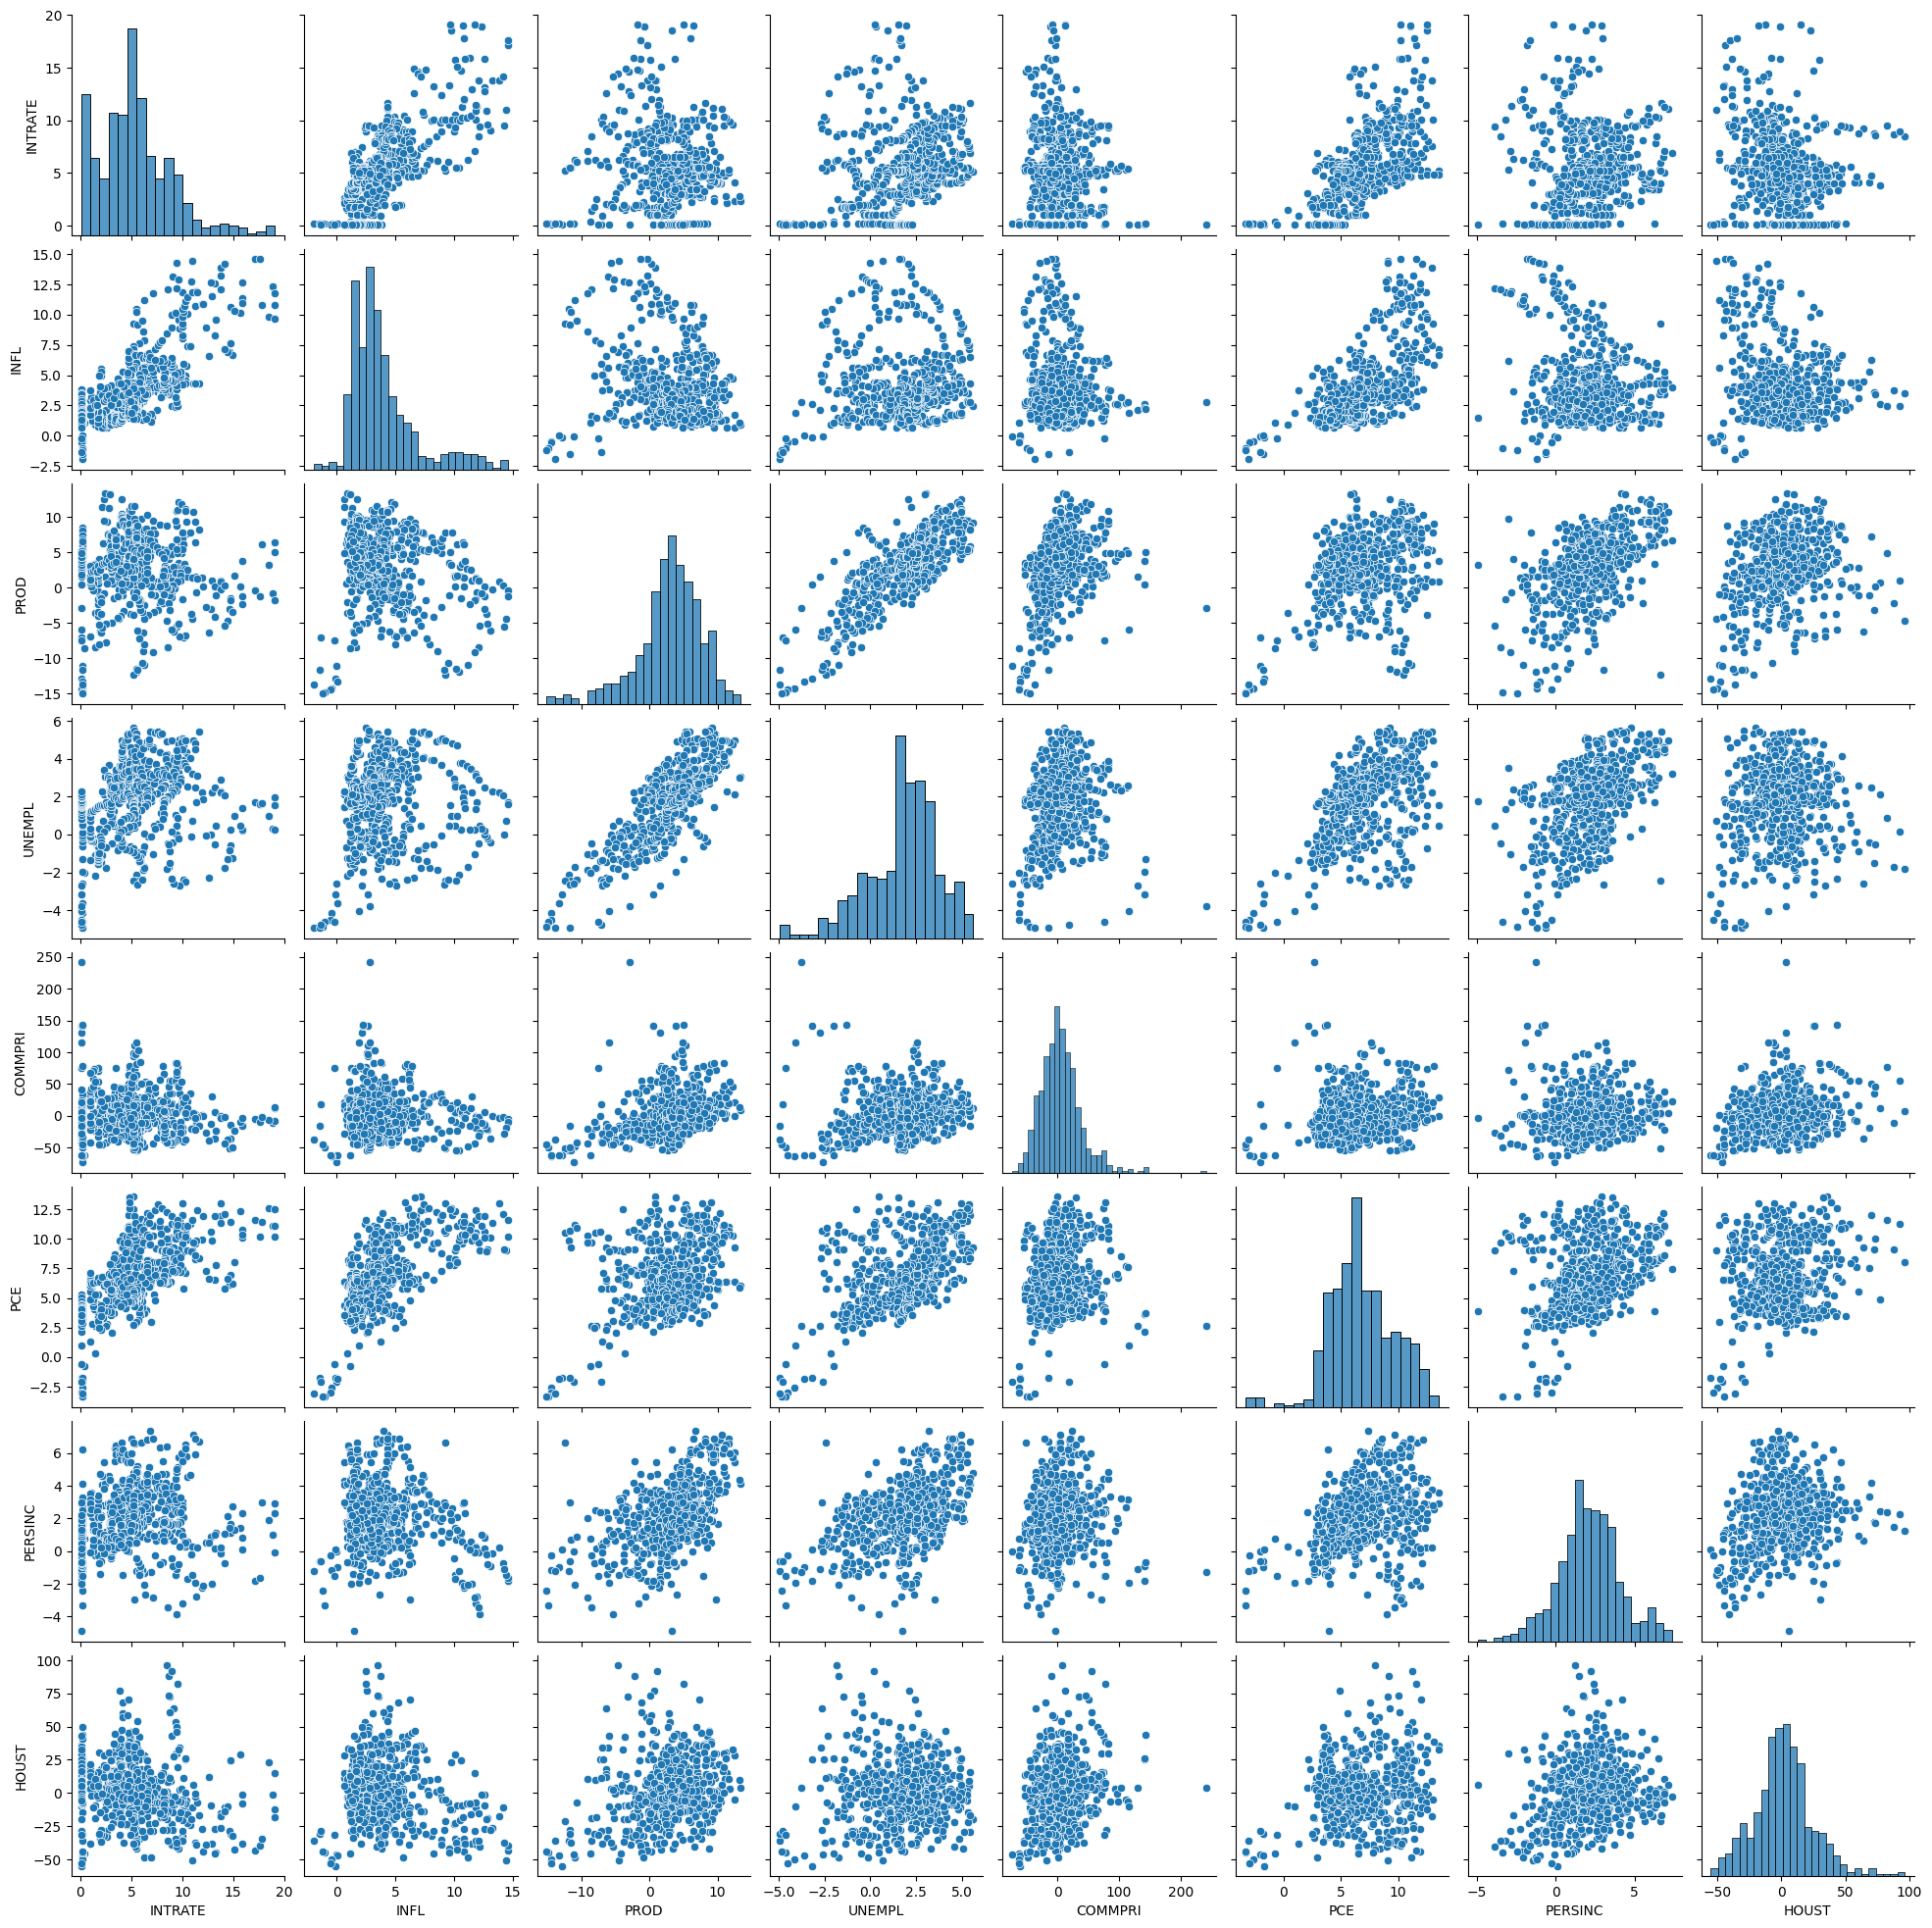

In [9]:
sns.pairplot(data=df.drop(columns='OBS'));

C:\Users\2160030302\AppData\Local\Temp\ipykernel_20824\3685723350.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=round(df.corr(), 2), annot=True, vmax=1, vmin=-1, cmap='Spectral');


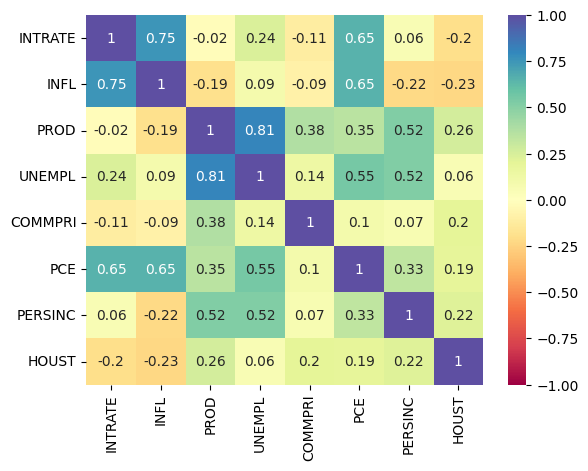

In [13]:
sns.heatmap(data=round(df.corr(), 2), annot=True, vmax=1, vmin=-1, cmap='Spectral');

### (a) 
* Use general-to-specific to come to a model. Start by regressing the federal funds rate on the other 7 variables 
and eliminate 1 variable at a time.

### Analise com todas as variáveis 

In [14]:
y = df['INTRATE']
x = df.drop(columns={'OBS','INTRATE'})

In [16]:
X = sm.add_constant(x)

In [17]:
model = sm.OLS(y, X).fit()

In [18]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                INTRATE   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     164.5
Date:                Sat, 12 Apr 2025   Prob (F-statistic):          1.64e-139
Time:                        20:36:34   Log-Likelihood:                -1449.2
No. Observations:                 660   AIC:                             2914.
Df Residuals:                     652   BIC:                             2950.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2212      0.245     -0.903      0.3

### Excluindo a primeira variável 

In [19]:
y = df['INTRATE']
x = df.drop(columns={'OBS','INTRATE', 'UNEMPL'})

In [20]:
X = sm.add_constant(x)

In [21]:
model_2 = sm.OLS(y, X).fit()

In [23]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                INTRATE   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     191.7
Date:                Sat, 12 Apr 2025   Prob (F-statistic):          1.99e-140
Time:                        20:43:54   Log-Likelihood:                -1449.7
No. Observations:                 660   AIC:                             2913.
Df Residuals:                     653   BIC:                             2945.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2909      0.236     -1.232      0.2

### Excluindo a segunda variável 

In [24]:
y = df['INTRATE']
x = df.drop(columns={'OBS','INTRATE', 'UNEMPL', 'PROD'})

In [25]:
X = sm.add_constant(x)

In [26]:
model_3 = sm.OLS(y, X).fit()

In [27]:
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                INTRATE   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     229.9
Date:                Sat, 12 Apr 2025   Prob (F-statistic):          2.03e-141
Time:                        20:44:50   Log-Likelihood:                -1450.2
No. Observations:                 660   AIC:                             2912.
Df Residuals:                     654   BIC:                             2939.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2401      0.230     -1.042      0.2

### (b) 
* Use specific-to-general to come to a model. Start by regressing the federal funds rate on only a constant and 
add 1 variable at a time. Is the model the same as in (a)?

In [37]:
candidate_vars = ['INFL', 'PROD', 'UNEMPL', 'COMMPRI', 'PCE', 'PERSINC', 'HOUST']
included_vars = [] 

In [38]:
def fit_model(vars):
    X = df[vars]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return model

In [44]:
# Forward stepwise
while True:
    best_aic = float('inf')
    best_model = None
    best_var = None
    
    # Testa adicionar cada variável ainda não incluída
    for var in [v for v in candidate_vars if v not in included_vars]:
        vars_to_test = included_vars + [var]
        model = fit_model(vars_to_test)
        if model.aic < best_aic and model.pvalues[var] < 0.05:
            best_aic = model.aic
            best_model = model
            best_var = var

    if best_var:
        included_vars.append(best_var)
        print(f"Variável adicionada: {best_var}, AIC: {best_aic:.2f}")
    else:
        break

# Mostrar resultado final
print("\n=== Modelo final ===")
best_model = fit_model(included_vars)
print(best_model.summary())


=== Modelo final ===
                            OLS Regression Results                            
Dep. Variable:                INTRATE   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     229.9
Date:                Sat, 12 Apr 2025   Prob (F-statistic):          2.03e-141
Time:                        21:01:58   Log-Likelihood:                -1450.2
No. Observations:                 660   AIC:                             2912.
Df Residuals:                     654   BIC:                             2939.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2401      0.2

### Considerações finais :
* Utilizando o metódo stepwise forward o modelo segue com a mesma configuração de variáveis 

### c) 
* Compare your model from (a) and the Taylor rule of equation (1). Consider R2
, AIC and BIC. Which of t e
models do you prefer?

In [45]:
y = df['INTRATE']
model_taylor = fit_model(['INFL', 'PROD'])

In [64]:
# Comparação
comparison = pd.DataFrame({
    'Modelo': ['Regra de Taylor (1)', 'Modelo (a) – Estatístico'],
    'R2 ajustado': [model_taylor.rsquared_adj, model_3.rsquared_adj],
    'AIC': [model_taylor.aic, model_3.aic],
    'BIC': [model_taylor.bic, model_3.bic]
})

In [65]:
print(comparison)

                     Modelo  R2 ajustado          AIC          BIC
0       Regra de Taylor (1)     0.573407  3011.616343  3025.093063
1  Modelo (a) – Estatístico     0.634588  2912.423247  2939.376686



* Modelo                   |	R²Ajustado|	AIC	     | BIC	  |Comentário
* Regra de Taylor	Menor  |	Maior     | Maior	 | Modelo |teórico mais simples
* Modelo (a) – Estatístico |	Maior     | Menor	 | Menor  |Modelo ajustado aos dados, mais preditivo


### (d) 
* Test the Taylor rule of equation (1) using the RESET test, Chow break and forecast test (with in both tests as 
break date January 1980) and a Jarque-Bera test. What do you conclude?

In [56]:
reset_test = linear_reset(model_taylor, power=2, use_f=True)
print("RESET Test (Ramsey):", reset_test)

RESET Test (Ramsey): <F test: F=2.5371195394336894, p=0.11167917790234713, df_denom=656, df_num=1>


C:\Users\2160030302\AppData\Local\anaconda3\Lib\site-packages\statsmodels\stats\diagnostic.py:1065: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


### reset_test
* p-valor ≥ 0.05, não rejeitamos H0 → o modelo parece estar bem especificado.
* Se o modelo incluir apenas inflação (INFL) e produção (PROD), ele pode deixar de fora variáveis como desemprego, gastos, etc., então o RESET pode acusar má especificação.

In [53]:
df['OBS'] = pd.to_datetime(df['OBS'].str.replace(':', '-'), format='%Y-%m')

In [57]:
df["OBS"] = pd.to_datetime(df["OBS"])
break_date = "1980-01-01"
break_index = df[df["OBS"] >= break_date].index[0]

In [58]:
df1 = df.iloc[:break_index]
df2 = df.iloc[break_index:]

In [59]:
y1, X1 = df1["INTRATE"], sm.add_constant(df1[["INFL", "PROD"]])
y2, X2 = df2["INTRATE"], sm.add_constant(df2[["INFL", "PROD"]])
model1 = sm.OLS(y1, X1).fit()
model2 = sm.OLS(y2, X2).fit()

In [60]:
SSR_pooled = model_taylor.ssr
SSR1 = model1.ssr
SSR2 = model2.ssr
k = X.shape[1]  # número de parâmetros
n1 = len(df1)
n2 = len(df2)

In [61]:
numerator = (SSR_pooled - (SSR1 + SSR2)) / k
denominator = (SSR1 + SSR2) / (n1 + n2 - 2 * k)
F_chow = numerator / denominator

print(f"Chow Test (F) = {F_chow:.4f}")

Chow Test (F) = 14.2357


### Chow Test 
* Chow Test (F) alto (acima de 3,5 geralmente), há forte indício de quebra estrutural.

In [63]:
# 3. TESTE DE JARQUE-BERA
jb_test = jarque_bera(model_taylor.resid)
print("Jarque-Bera Test:", jb_test)

Jarque-Bera Test: (12.444043308438728, 0.0019852277136482225, 0.32571817051429097, 3.1677538653763344)


### Jarque-Bera
* p-valor < 0.05, resíduos não são normais.